In [490]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [491]:
churn_data = pd.read_csv('Churn_Modelling.csv') 
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [492]:
churn_data.shape

(10000, 14)

In [493]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [494]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [495]:
def plot_geography():
    g = sns.countplot(
        y = 'Geography',
        data = churn_data[churn_data['Exited'] == 1],
        hue = 'Gender',
        order = churn_data[churn_data['Exited'] == 1]['Geography'].value_counts(sort = True, ascending= False).index
    )
    g.set_title('Top countries in Number of exites vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
    g.set_xlabel('Count', fontsize=15, fontweight='bold')
    g.set_ylabel('Country', fontsize=15, fontweight='bold')
    g.legend(prop={'weight':'bold'})
    plt.show()

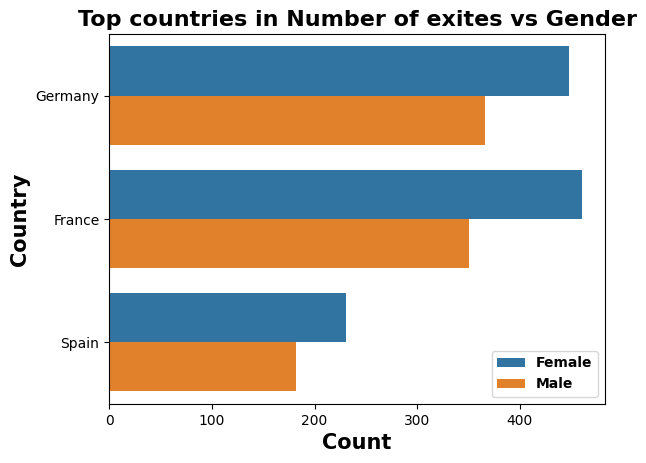

In [496]:
plot_geography()

In [497]:
churn_data[churn_data['Exited'] == 1]['Geography'].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [498]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [499]:
def plot_geographic_ratio():
    fig, ax = plt.subplots(1,3,figsize=(20,8) )
    colors = ['orange','lime']
    ax[0].barh(["not exited", "exited"],churn_data[churn_data['Geography'] == 'Germany']['Exited'].value_counts(),color = colors)
    ax[1].barh(["not exited", "exited"],churn_data[churn_data['Geography'] == 'France']['Exited'].value_counts(),color = colors)
    ax[2].barh(["not exited", "exited"],churn_data[churn_data['Geography'] == 'Spain']['Exited'].value_counts(),color = colors)
    ax[0].set_title("Germany")
    ax[1].set_title("France")
    ax[2].set_title("Spain")
    for i in range(3):
        ax[i].bar_label(ax[i].containers[0], label_type='center') 
        ax[i].set_xlabel("Count")

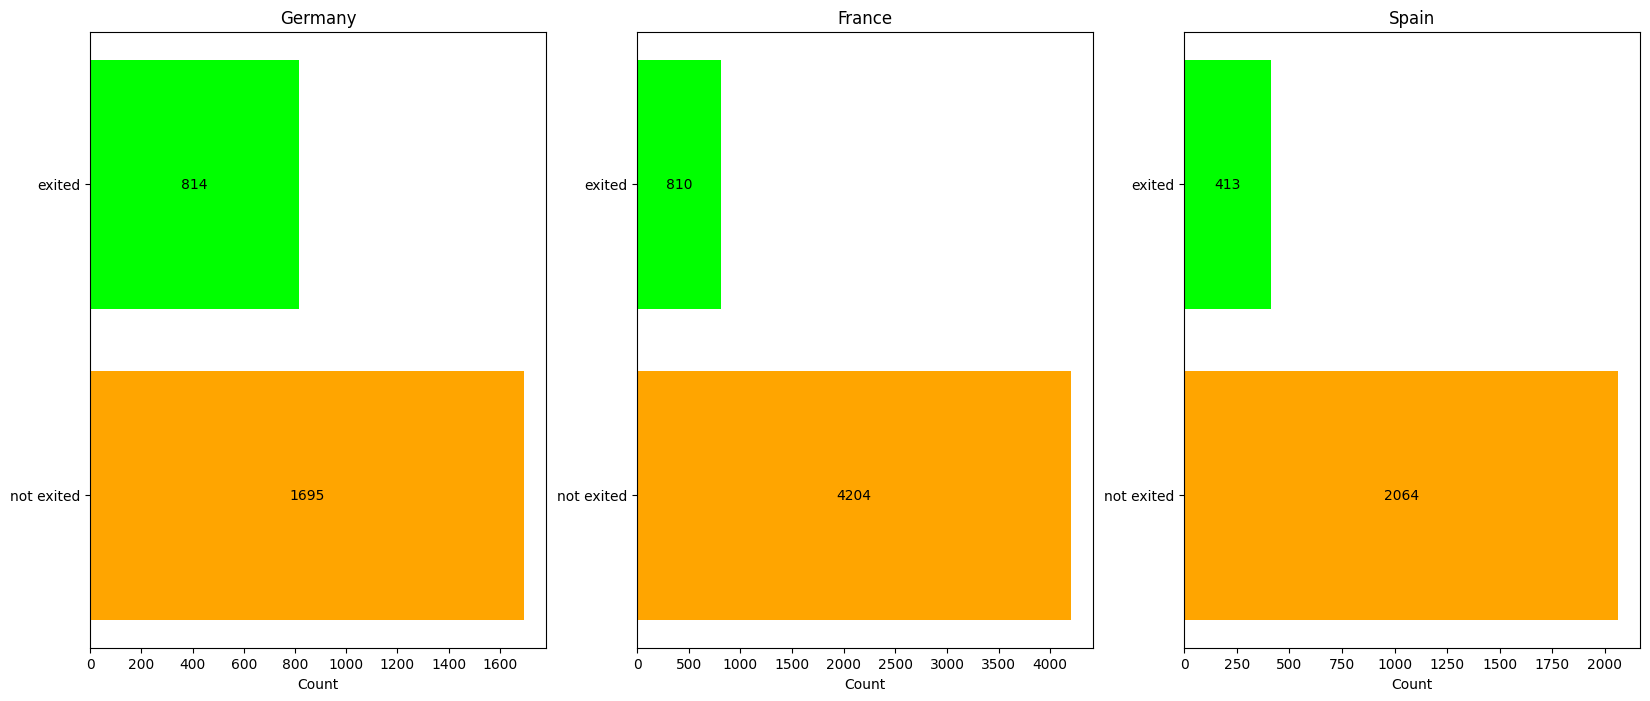

In [500]:
plot_geographic_ratio()

In [501]:
churn_data_excited= churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

In [502]:
def plot_gender_ratio():
    fig, ax = plt.subplots(3,3,figsize=(20,20))
    countries = churn_data['Geography'].unique()
    x = churn_data['Gender'].unique()
    i = 0
    for country in countries:
        dd = churn_data[churn_data['Geography'] == country]['Gender'].value_counts()
        sns.barplot(ax= ax[i,0], x = dd.index, y = dd.values)
        dd = churn_data_excited[churn_data['Geography'] == country]['Gender'].value_counts()
        sns.barplot(ax = ax[i,1], x = dd.index, y = dd.values)
        dd = churn_data_nonexited[churn_data['Geography'] == country]['Gender'].value_counts()
        sns.barplot(ax = ax[i,2], x = dd.index, y = dd.values)
        ax[i,0].set_title( country + " total")
        ax[i,1].set_title( country + " excited")
        ax[i,2].set_title( country + " non-exited")
        for j in range(3):
            ax[i,j].bar_label(ax[i,j].containers[0], label_type='center') 
        i += 1

C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\2045102031.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd = churn_data_excited[churn_data['Geography'] == country]['Gender'].value_counts()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\2045102031.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd = churn_data_nonexited[churn_data['Geography'] == country]['Gender'].value_counts()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\2045102031.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd = churn_data_excited[churn_data['Geography'] == country]['Gender'].value_counts()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\2045102031.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd = churn_data_nonexited[churn_data['Geography'] == country]['Gender'].value_counts()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\2045102031.py:9: UserWarning: Bool

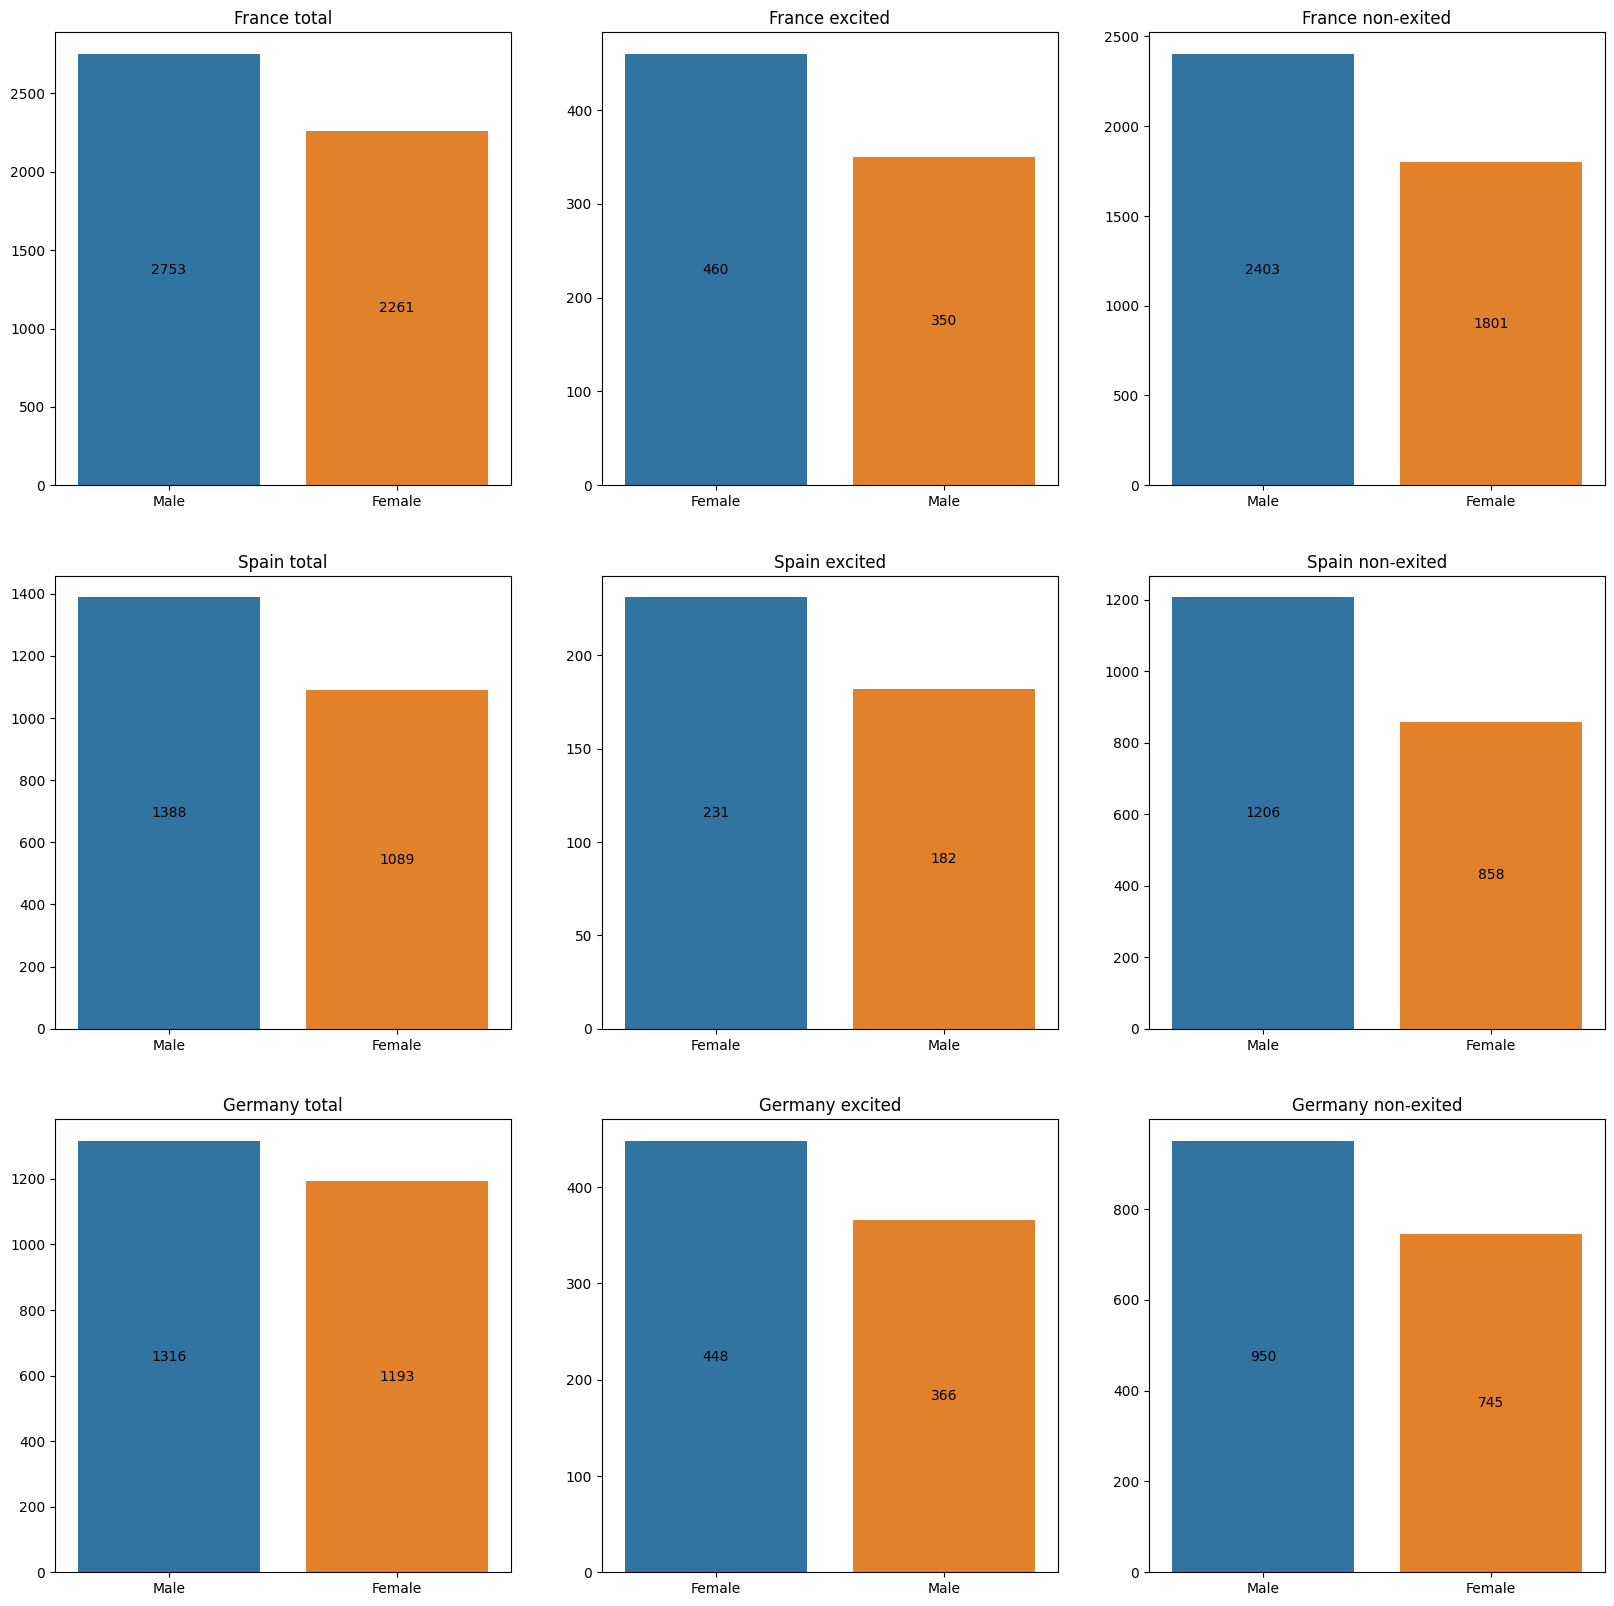

In [503]:
plot_gender_ratio()

In [504]:
def plot_age():
    plt.hist(churn_data_excited['Age'], color = 'lime')
    plt.xlabel("Age")
    plt.ylabel("Count")

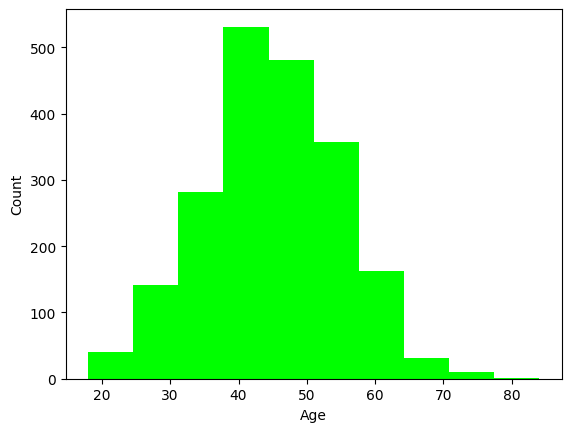

In [505]:
plot_age()

In [506]:
def plot_Tenure():
    plt.hist(churn_data_excited['Tenure'], color = 'lime')
    plt.xlabel("Tenure")
    plt.ylabel("Count")

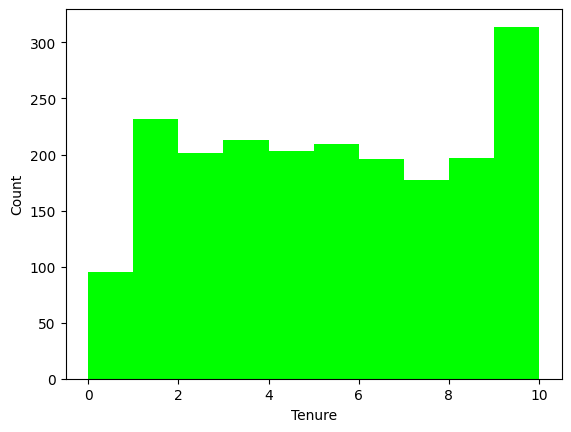

In [507]:
plot_Tenure()

In [508]:
churn_data['starting_age'] = churn_data['Age'] - churn_data['Tenure']

In [509]:
churn_data_excited= churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

(array([ 16.,  91., 220., 434., 476., 437., 252.,  85.,  25.,   1.]),
 array([10. , 16.6, 23.2, 29.8, 36.4, 43. , 49.6, 56.2, 62.8, 69.4, 76. ]),
 <BarContainer object of 10 artists>)

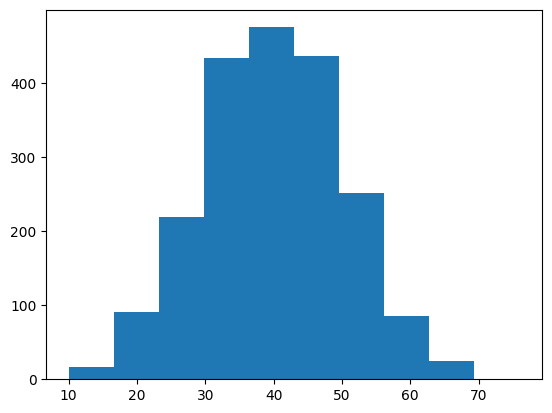

In [510]:
plt.hist(churn_data_excited['starting_age'])

(array([2.130e+02, 1.426e+03, 2.916e+03, 2.307e+03, 5.660e+02, 2.380e+02,
        1.860e+02, 9.300e+01, 1.600e+01, 2.000e+00]),
 array([ 8. , 16.3, 24.6, 32.9, 41.2, 49.5, 57.8, 66.1, 74.4, 82.7, 91. ]),
 <BarContainer object of 10 artists>)

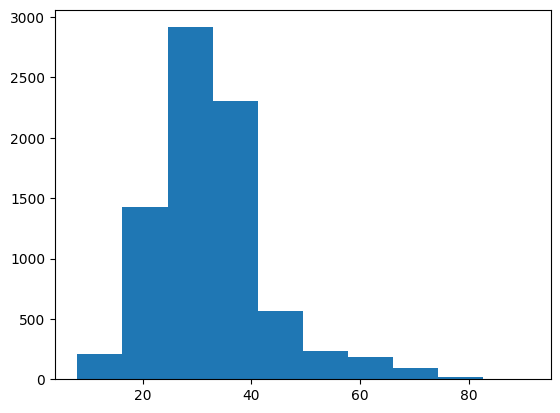

In [511]:
plt.hist(churn_data_nonexited['starting_age'])

In [512]:
def age_ints(x):
    if x < 21:
        return "between 18 and 21"
    elif x >= 21 and x < 30:
        return "between 21 and 30"
    elif x >= 30 and x < 40:
        return "between 30 an 40"
    elif x >= 40 and x < 50:
        return "between 40 an 50"
    elif x >= 50 and x < 60:
        return "between 50 an 60"
    else:
        return "above 60"


In [513]:
churn_data['age_intervals'] = churn_data['Age'].map(lambda x : age_ints(x))

In [514]:
churn_data_excited = churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

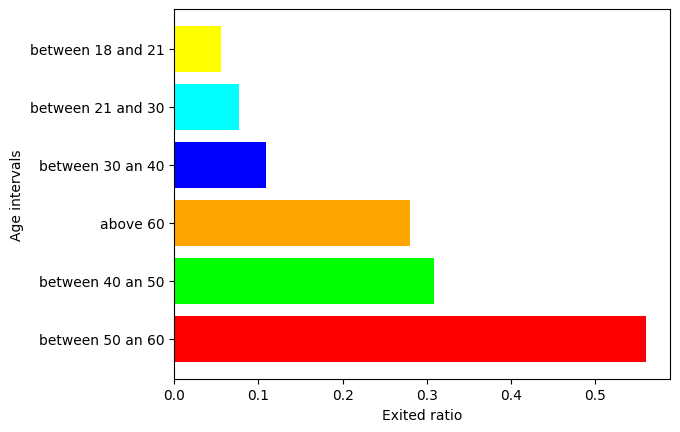

In [515]:
z = (churn_data_excited['age_intervals'].value_counts() / churn_data['age_intervals'].value_counts()).sort_values(ascending = False)
plt.barh(z.index, z.values, color = ['red','lime','orange','blue','aqua','yellow'])
plt.xlabel("Exited ratio")
plt.ylabel("Age intervals")
plt.show()

In [516]:
def starting_age_ints(x):
    if x < 21:
        return "between 18 and 21"
    elif x >= 21 and x < 30:
        return "between 21 and 30"
    elif x >= 30 and x < 40:
        return "between 30 an 40"
    elif x >= 40 and x < 50:
        return "between 40 an 50"
    elif x >= 50 and x < 60:
        return "between 50 an 60"
    else:
        return "above 60"
churn_data['starting_age_ints'] = churn_data['starting_age'].map(lambda x : starting_age_ints(x))

In [517]:
churn_data_excited = churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

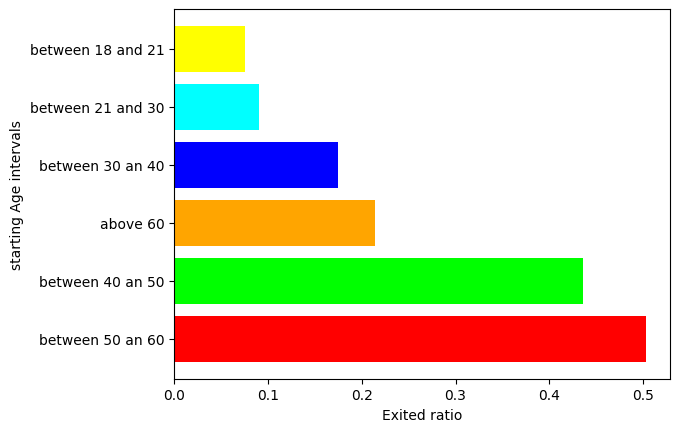

In [518]:
z = (churn_data_excited['starting_age_ints'].value_counts() / churn_data['starting_age_ints'].value_counts()).sort_values(ascending = False)
plt.barh(z.index, z.values, color = ['red','lime','orange','blue','aqua','yellow'])
plt.xlabel("Exited ratio")
plt.ylabel("starting Age intervals")
plt.show()

In [519]:
churn_data.groupby('starting_age_ints')['Tenure'].quantile(0.25)

starting_age_ints
above 60             1.0
between 18 and 21    6.0
between 21 and 30    4.0
between 30 an 40     2.0
between 40 an 50     2.0
between 50 an 60     2.0
Name: Tenure, dtype: float64

In [520]:
churn_data.groupby('starting_age_ints')['Tenure'].quantile(0.5)

starting_age_ints
above 60             3.0
between 18 and 21    8.0
between 21 and 30    6.0
between 30 an 40     4.0
between 40 an 50     4.0
between 50 an 60     4.0
Name: Tenure, dtype: float64

In [521]:
churn_data.groupby('starting_age_ints')['Tenure'].quantile(0.75)

starting_age_ints
above 60             6.0
between 18 and 21    9.0
between 21 and 30    8.0
between 30 an 40     7.0
between 40 an 50     6.0
between 50 an 60     7.0
Name: Tenure, dtype: float64

In [522]:
churn_data_excited['CreditScore'].describe()

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

(array([ 19.,  42.,  89., 211., 299., 389., 364., 303., 193., 128.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

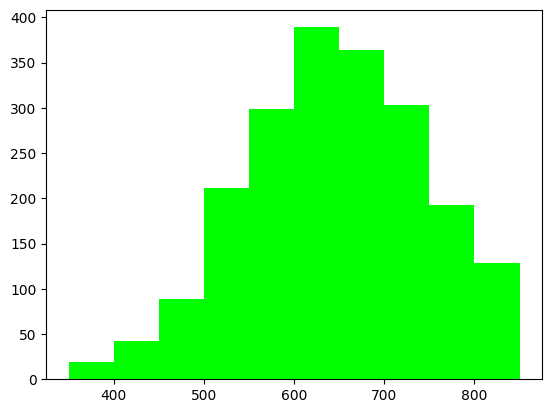

In [523]:
plt.hist(churn_data_excited['CreditScore'],color = 'lime')

(array([ 124.,  294.,  616.,  880., 1243., 1403., 1376.,  948.,  606.,
         473.]),
 array([405. , 449.5, 494. , 538.5, 583. , 627.5, 672. , 716.5, 761. ,
        805.5, 850. ]),
 <BarContainer object of 10 artists>)

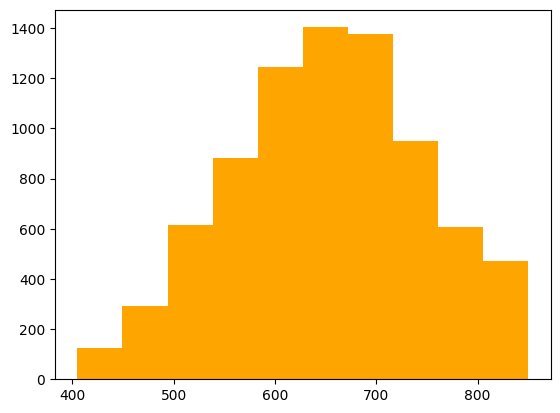

In [524]:
plt.hist(churn_data_nonexited['CreditScore'],color = 'orange')

In [525]:
def code_credit(x):
    if x < 400:
        return "below 400"
    elif x >= 400 and x < 500:
        return "between 400 and 500"
    elif x >= 500 and x < 600:
        return "between 500 and 600"
    elif x >= 600 and x < 700:
        return "between 600 and 700"
    elif x >= 700 and x < 800:
        return "between 700 and 800"
    else:
        return "above 800"

In [526]:
churn_data['credit_intervals'] = churn_data['CreditScore'].map(lambda x : code_credit(x))
churn_data_excited = churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

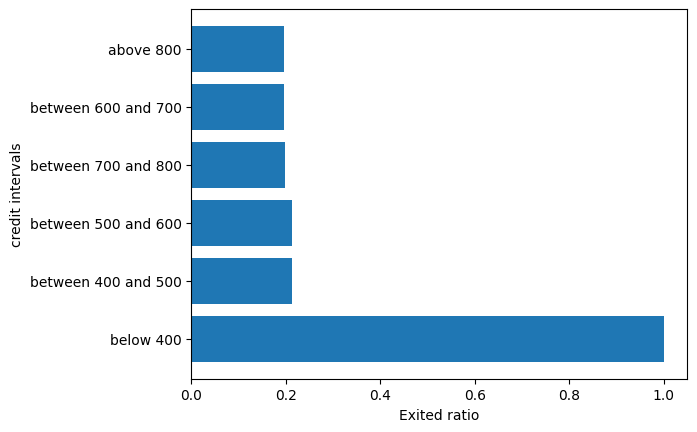

In [527]:
z = (churn_data_excited['credit_intervals'].value_counts() / churn_data['credit_intervals'].value_counts()).sort_values(ascending = False)
plt.barh(z.index, z.values) #color = ['red','lime','orange','blue','aqua','yellow'])
plt.xlabel("Exited ratio")
plt.ylabel("credit intervals")
plt.show()

In [528]:
churn_data.groupby('credit_intervals')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_intervals,,,,,,,,
above 800,655.0,39.009160,10.643654,18.0,32.0,37.0,44.0,81.0
below 400,19.0,43.736842,9.520983,28.0,37.5,44.0,51.5,60.0
between 400 and 500,613.0,38.758564,10.258925,19.0,32.0,37.0,44.0,84.0
between 500 and 600,2402.0,38.861782,10.291060,18.0,32.0,37.0,44.0,88.0
between 600 and 700,3818.0,39.029597,10.544759,18.0,32.0,37.0,44.0,83.0
between 700 and 800,2493.0,38.795026,10.608385,18.0,32.0,37.0,44.0,92.0


In [529]:
def code_balance(x):
    if x < 50000:
        return "below 50000"
    elif x >= 50000 and x < 75000:
        return "between 50000 and 75000"
    elif x >= 75000 and x < 100000:
        return "between 75000 and 100000"
    elif x >= 100000 and x < 125000:
        return "between 100000 and 125000"
    elif x >= 125000 and x < 150000:
        return "between 125000 and 150000"
    elif x >= 150000 and x < 175000:
        return "between 150000 and 175000"
    elif x >= 175000 and x < 200000:
        return "between 175000 and 200000"
    else:
        return "above 200000"

In [530]:
churn_data['Balance_ints'] = churn_data['Balance'].map(lambda x : code_balance(x))
churn_data_excited = churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]

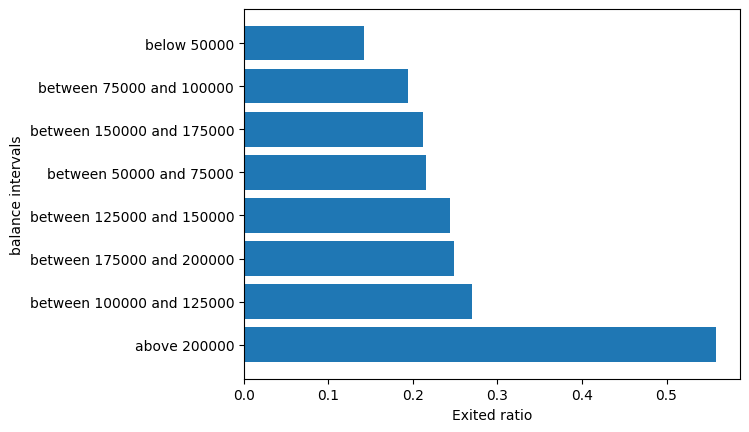

In [531]:
z = (churn_data_excited['Balance_ints'].value_counts() / churn_data['Balance_ints'].value_counts()).sort_values(ascending = False)
plt.barh(z.index, z.values) #color = ['red','lime','orange','blue','aqua','yellow'])
plt.xlabel("Exited ratio")
plt.ylabel("balance intervals")
plt.show()

<AxesSubplot: >

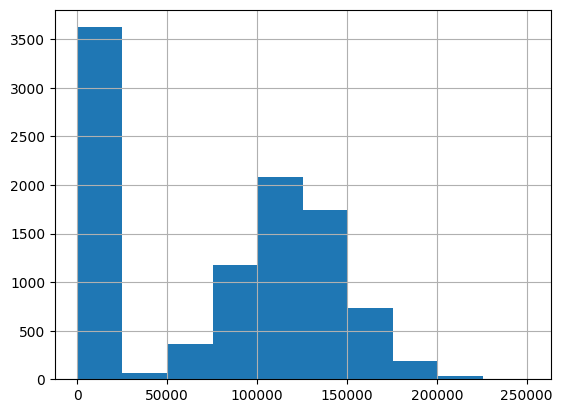

In [532]:
churn_data['Balance'].hist()

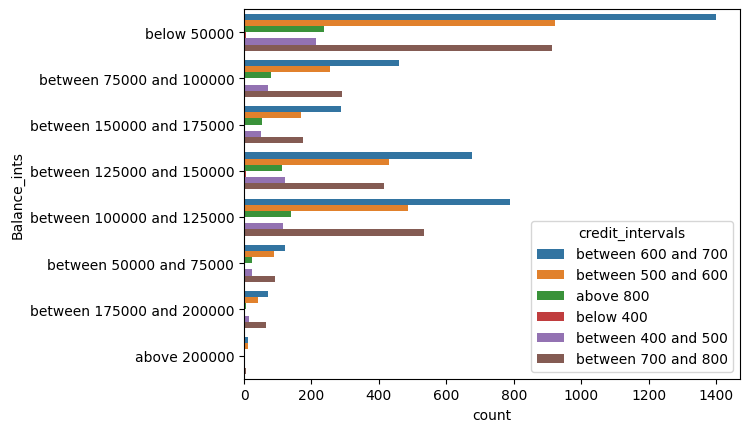

In [533]:
g = sns.countplot(
    y = 'Balance_ints',
    data = churn_data,
    hue = 'credit_intervals'
)
plt.show()

In [534]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'starting_age',
       'age_intervals', 'starting_age_ints', 'credit_intervals',
       'Balance_ints'],
      dtype='object')

Text(0.5, 0, 'excitation ratio')

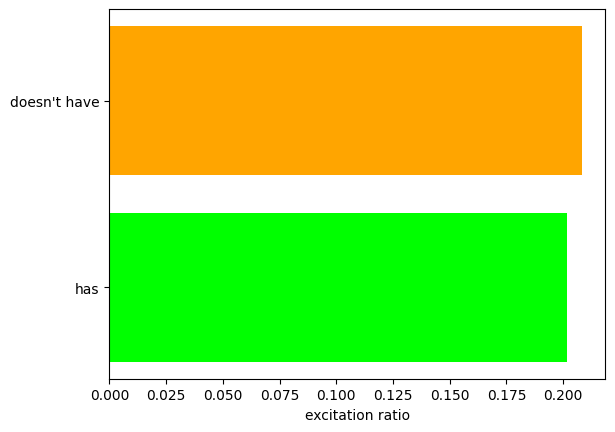

In [535]:
fig ,ax = plt.subplots()
ax.barh(["has","doesn't have"],
                churn_data_excited['HasCrCard'].value_counts().values / churn_data['HasCrCard'].value_counts(), color = ['lime','orange'])
ax.set_xlabel("excitation ratio")

Text(0.5, 0, 'excitation ratio')

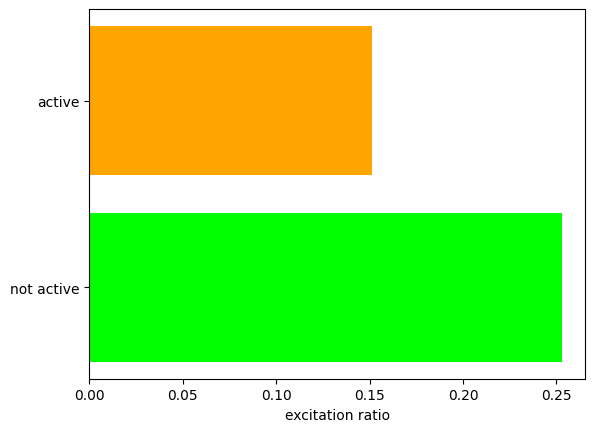

In [536]:
fig ,ax = plt.subplots()
ax.barh(["not active","active"],
                churn_data_excited['IsActiveMember'].value_counts().values/ churn_data['IsActiveMember'].value_counts() , color = ['lime','orange'])
ax.set_xlabel("excitation ratio")

In [537]:
target = churn_data['Exited']
churn_data.drop(['RowNumber','CustomerId', 'Surname'],axis = 1, inplace = True)
churn_data_excited = churn_data[churn_data['Exited'] == 1]
churn_data_nonexited = churn_data[churn_data['Exited'] == 0]
churn_data.drop(['Exited'],axis = 1, inplace = True)
churn_data.drop(['starting_age',
                    'age_intervals', 'starting_age_ints', 'credit_intervals',
                    'Balance_ints'],axis = 1, inplace=True)

churn_data_excited.drop(['Exited','starting_age',
                    'age_intervals', 'starting_age_ints', 'credit_intervals',
                    'Balance_ints'],axis = 1, inplace=True)
churn_data_nonexited.drop(['Exited','starting_age',
                    'age_intervals', 'starting_age_ints', 'credit_intervals',
                    'Balance_ints'],axis = 1, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\10038091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data_excited.drop(['Exited','starting_age',
C:\Users\Acer\AppData\Local\Temp\ipykernel_6352\10038091.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data_nonexited.drop(['Exited','starting_age',


In [538]:
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [539]:
churn_data_excited.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [540]:
churn_data = pd.get_dummies(churn_data,drop_first=True)
churn_data_excited = pd.get_dummies(churn_data_excited,drop_first=True)
churn_data_nonexited = pd.get_dummies(churn_data_nonexited,drop_first=True)

In [541]:
churn_data_excited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
16,653,58,1,132602.88,1,1,0,5097.67,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1,0,1
9982,655,46,7,137145.12,1,1,0,115146.40,1,0,0
9991,597,53,4,88381.21,1,1,0,69384.71,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0


<AxesSubplot: >

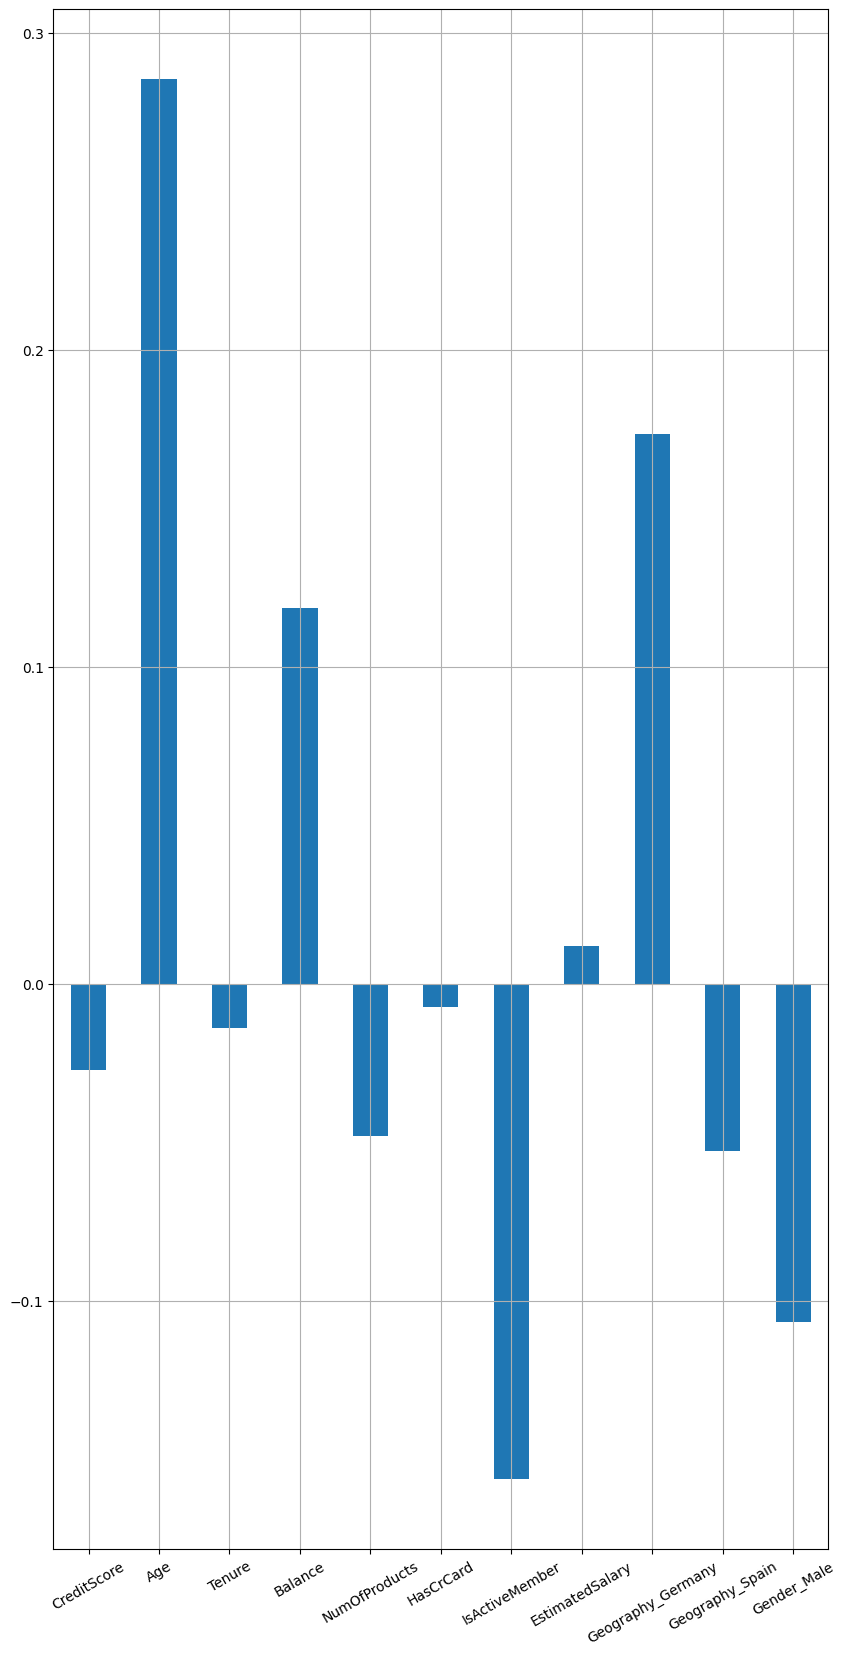

In [542]:
churn_data.corrwith(target).plot.bar(figsize=(10,20),rot=30,grid=True)

In [550]:
X = churn_data
y= target

In [571]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=123)


In [553]:
sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)

In [554]:
X_train

array([[-1.25158147,  2.09198686, -1.38699534, ..., -0.57796611,
        -0.57611859,  0.90990702],
       [ 0.19694592, -0.93505244,  0.68830941, ..., -0.57796611,
        -0.57611859,  0.90990702],
       [-0.28934542, -1.21883738,  1.38007766, ..., -0.57796611,
        -0.57611859,  0.90990702],
       ...,
       [ 0.36249191, -1.78640724, -0.34934297, ..., -0.57796611,
        -0.57611859,  0.90990702],
       [-0.07206631, -0.84045746, -0.00345884, ..., -0.57796611,
        -0.57611859,  0.90990702],
       [ 0.37283854, -0.36748257, -0.34934297, ..., -0.57796611,
        -0.57611859,  0.90990702]])

In [556]:
model = LogisticRegression(random_state=123).fit(X_train,y_train)
y_pred= model.predict(X_test)

In [570]:
print("classification logistic \n", classification_report(y_test,y_pred))

classification 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1983
           1       0.64      0.23      0.34       517

    accuracy                           0.81      2500
   macro avg       0.73      0.60      0.61      2500
weighted avg       0.79      0.81      0.78      2500



In [580]:
model_forest = RandomForestClassifier(max_depth=6, random_state=123)
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

In [581]:
print("classification forest \n", classification_report(y_test,y_pred_forest))

classification forest 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1983
           1       0.82      0.39      0.53       517

    accuracy                           0.86      2500
   macro avg       0.84      0.68      0.72      2500
weighted avg       0.85      0.86      0.83      2500

